# 1. Data Data Preparation

In [1759]:
import pandas as pd
import numpy as np


In [1760]:
df = pd.read_csv('framingham.csv')


In [1761]:
df.columns = df.columns.str.lower()


In [1762]:
df.head().T


,0,1,2,3,4
male,1.00,0.00,1.00,0.00,0.0
age,39.00,46.00,48.00,61.00,46.0
education,4.00,2.00,1.00,3.00,3.0
currentsmoker,0.00,0.00,1.00,1.00,1.0
cigsperday,0.00,0.00,20.00,30.00,23.0
bpmeds,0.00,0.00,0.00,0.00,0.0
prevalentstroke,0.00,0.00,0.00,0.00,0.0
prevalenthyp,0.00,0.00,0.00,1.00,0.0
diabetes,0.00,0.00,0.00,0.00,0.0
totchol,195.00,250.00,245.00,225.00,285.0


In [1763]:
df.nunique()

male                  2
age                  39
education             4
currentsmoker         2
cigsperday           33
bpmeds                2
prevalentstroke       2
prevalenthyp          2
diabetes              2
totchol             248
sysbp               234
diabp               146
bmi                1363
heartrate            73
glucose             143
tenyearchd            2
dtype: int64

In [1764]:
df.dtypes


male                 int64
age                  int64
education          float64
currentsmoker        int64
cigsperday         float64
bpmeds             float64
prevalentstroke      int64
prevalenthyp         int64
diabetes             int64
totchol            float64
sysbp              float64
diabp              float64
bmi                float64
heartrate          float64
glucose            float64
tenyearchd           int64
dtype: object

In [1765]:
df.nunique()

male                  2
age                  39
education             4
currentsmoker         2
cigsperday           33
bpmeds                2
prevalentstroke       2
prevalenthyp          2
diabetes              2
totchol             248
sysbp               234
diabp               146
bmi                1363
heartrate            73
glucose             143
tenyearchd            2
dtype: int64

In [1766]:
df['male'] = df['male'].astype(str)
df['education'] = df['education'].astype(str)
df['currentsmoker'] = df['currentsmoker'].astype(str)
df['bpmeds'] = df['bpmeds'].astype(str)
df['prevalentstroke'] = df['prevalenthyp'].astype(str)
df['diabetes'] = df['diabetes'].astype(str)
df['prevalenthyp'] = df['prevalenthyp'].astype(str)

In [1767]:
df.nunique()

male                  2
age                  39
education             5
currentsmoker         2
cigsperday           33
bpmeds                3
prevalentstroke       2
prevalenthyp          2
diabetes              2
totchol             248
sysbp               234
diabp               146
bmi                1363
heartrate            73
glucose             143
tenyearchd            2
dtype: int64

In [1768]:
df.dtypes

male                object
age                  int64
education           object
currentsmoker       object
cigsperday         float64
bpmeds              object
prevalentstroke     object
prevalenthyp        object
diabetes            object
totchol            float64
sysbp              float64
diabp              float64
bmi                float64
heartrate          float64
glucose            float64
tenyearchd           int64
dtype: object

## 1.1 EDA for Missing Values

In [1769]:
numerical = ['age', 'cigsperday', 'totchol', 'sysbp',
             'diabp', 'bmi', 'heartrate', 'glucose']


In [1770]:
categorical = ['male', 'education', 'currentsmoker', 'bpmeds',
               'prevalentstroke', 'prevalenthyp', 'diabetes']


In [1771]:
df[categorical].head()


,male,education,currentsmoker,bpmeds,prevalentstroke,prevalenthyp,diabetes
0,1,4.0,0,0.0,0,0,0
1,0,2.0,0,0.0,0,0,0
2,1,1.0,1,0.0,0,0,0
3,0,3.0,1,0.0,1,1,0
4,0,3.0,1,0.0,0,0,0


In [1772]:
df[categorical].isnull().sum()


male               0
education          0
currentsmoker      0
bpmeds             0
prevalentstroke    0
prevalenthyp       0
diabetes           0
dtype: int64

In [1773]:
df.education = df.education.fillna(0)


In [1774]:
df.bpmeds = df.bpmeds.fillna(0)


In [1775]:
df[categorical].isnull().sum()


male               0
education          0
currentsmoker      0
bpmeds             0
prevalentstroke    0
prevalenthyp       0
diabetes           0
dtype: int64

In [1776]:
df[numerical].isnull().sum()


age             0
cigsperday     29
totchol        50
sysbp           0
diabp           0
bmi            19
heartrate       1
glucose       388
dtype: int64

In [1777]:
df.cigsperday = df.cigsperday.fillna(df.cigsperday.mean())


In [1778]:
df.heartrate = df.heartrate.fillna(df.heartrate.mean())


categorical variable filled with 0, numerical varible filled mean values.

In [1779]:
df.glucose = df.glucose.fillna(df.glucose.mean())


In [1780]:
df.totchol = df.totchol.fillna(df.totchol.mean())


In [1781]:
df.bmi = df.bmi.fillna(df.bmi.mean())


In [1782]:
df.isnull().sum()


male               0
age                0
education          0
currentsmoker      0
cigsperday         0
bpmeds             0
prevalentstroke    0
prevalenthyp       0
diabetes           0
totchol            0
sysbp              0
diabp              0
bmi                0
heartrate          0
glucose            0
tenyearchd         0
dtype: int64

In [1783]:
df.head()

,male,age,education,currentsmoker,cigsperday,bpmeds,prevalentstroke,prevalenthyp,diabetes,totchol,sysbp,diabp,bmi,heartrate,glucose,tenyearchd
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,1,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [1784]:
df.columns

Index(['male', 'age', 'education', 'currentsmoker', 'cigsperday', 'bpmeds',
       'prevalentstroke', 'prevalenthyp', 'diabetes', 'totchol', 'sysbp',
       'diabp', 'bmi', 'heartrate', 'glucose', 'tenyearchd'],
      dtype='object')

In [1785]:
df[numerical].head()


,age,cigsperday,totchol,sysbp,diabp,bmi,heartrate,glucose
0,39,0.0,195.0,106.0,70.0,26.97,80.0,77.0
1,46,0.0,250.0,121.0,81.0,28.73,95.0,76.0
2,48,20.0,245.0,127.5,80.0,25.34,75.0,70.0
3,61,30.0,225.0,150.0,95.0,28.58,65.0,103.0
4,46,23.0,285.0,130.0,84.0,23.10,85.0,85.0


## 1.2 The Validation Frame

In [1786]:
from sklearn.model_selection import train_test_split


In [1787]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)
len(df_train), len(df_val), len(df_test)

(2542, 848, 848)

In [1788]:
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [1789]:
y_train = df_train.tenyearchd.values
y_val = df_val.tenyearchd.values
y_test = df_test.tenyearchd.values


y_train_tree = y_train
y_val_tree = y_val
y_test_tree = y_test


y_train_forest = y_train
y_val_forest = y_val
y_test_forest = y_test

y_train_boost = y_train
y_val_boost = y_val
y_test_boost = y_test

In [1790]:
del df_train['tenyearchd']
del df_val['tenyearchd']
del df_test['tenyearchd']


df_train_tree = df_train
df_val_tree = df_val
df_test_tree = df_test

df_train_forest = df_train
df_val_foresst = df_val
df_test_forest = df_test


df_train_boost = df_train
df_val_boost = df_val
df_test_boost = df_test

# 2. Exploratory Data Analysis

## 2.1 Exploratory Data Analysis For Numeric Variables

In [1791]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


<AxesSubplot:title={'center':'cigsperday'}, xlabel='tenyearchd'>

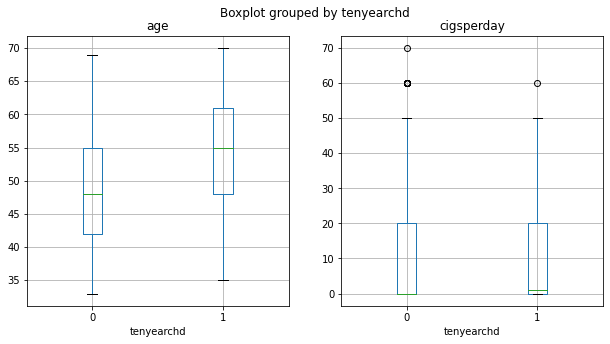

In [1792]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
df_full_train.boxplot('age', 'tenyearchd', ax=ax[0])
df_full_train.boxplot('cigsperday', 'tenyearchd', ax=ax[1])


Seems like people who 10 year risk of coronary heart disease slightly older than other class.
For both class distribution of number of cigarettes that the person smoked on average in one day is  right skewed distribution.

<AxesSubplot:title={'center':'sysbp'}, xlabel='tenyearchd'>

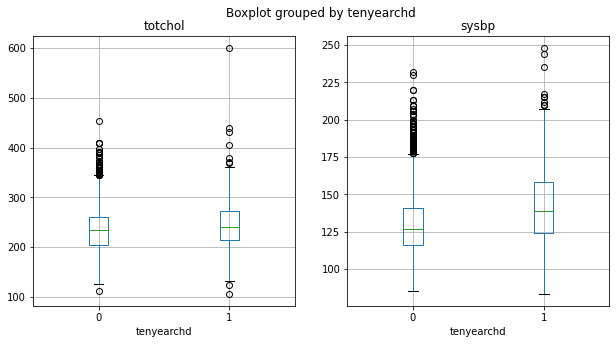

In [1793]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
df_full_train.boxplot('totchol', 'tenyearchd', ax=ax[0])
df_full_train.boxplot('sysbp', 'tenyearchd', ax=ax[1])


Mean of **total cholesterol** level approximately 220-240 for both class and there is few outlier.
Men of **Systolic blood pressure** for class 1 more than class 0. People who 10 year risk of CHD higher systolic blood pressure.

<AxesSubplot:title={'center':'bmi'}, xlabel='tenyearchd'>

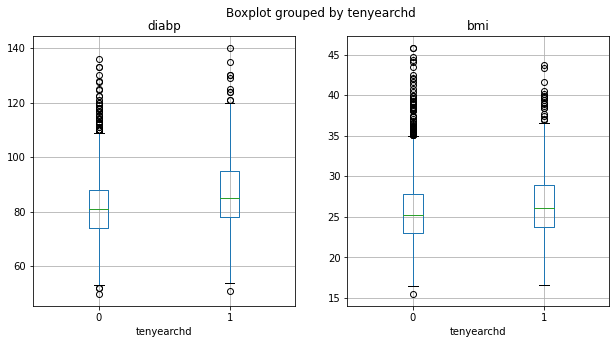

In [1794]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
df_full_train.boxplot('diabp', 'tenyearchd', ax=ax[0])
df_full_train.boxplot('bmi', 'tenyearchd', ax=ax[1])


Mean of **diastolic blood pressure** 81 for class 0, 85 for class 1. People who 10 year risk of CHD higher diastolic blood pressure.But considering outlier of class 0 diastolic blood pressure is not enough the explanation risk of CHD.



<AxesSubplot:title={'center':'glucose'}, xlabel='tenyearchd'>

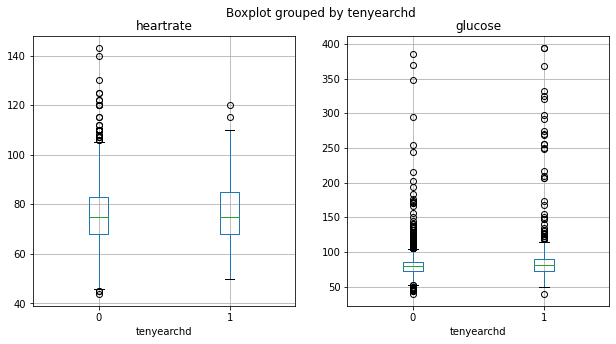

In [1795]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
df_full_train.boxplot('heartrate', 'tenyearchd', ax=ax[0])
df_full_train.boxplot('glucose', 'tenyearchd', ax=ax[1])


High **heart rate** doesn't cause ten year risk of CHD. But statistically has to be test. **Glucose level** contains many outlier observations for both class. It is not the only decisive factor.

## 2.2 Exploratory Data Analysis For Categorical Variable

In [1796]:
df_full_train[categorical].head()


,male,education,currentsmoker,bpmeds,prevalentstroke,prevalenthyp,diabetes
3873,1,nan,0,0.0,0,0,0
781,1,3.0,1,0.0,0,0,0
703,0,3.0,0,0.0,0,0,0
2675,1,2.0,1,0.0,0,0,0
394,0,2.0,0,0.0,1,1,0


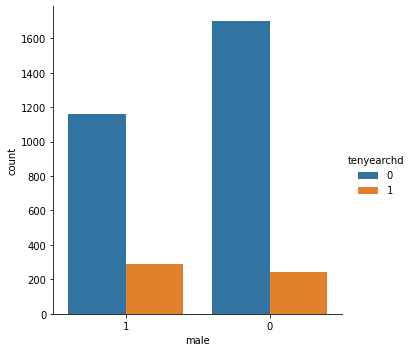

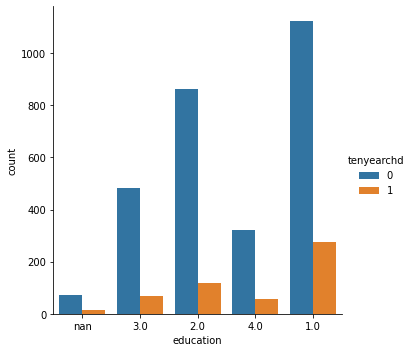

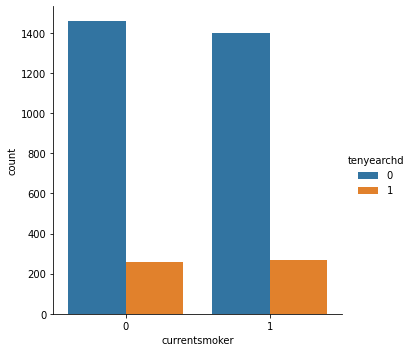

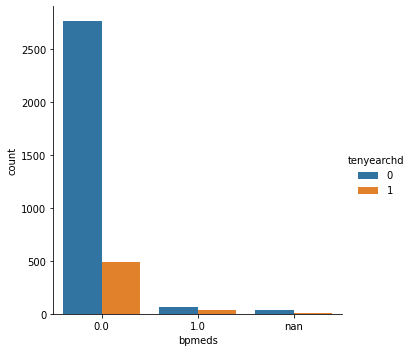

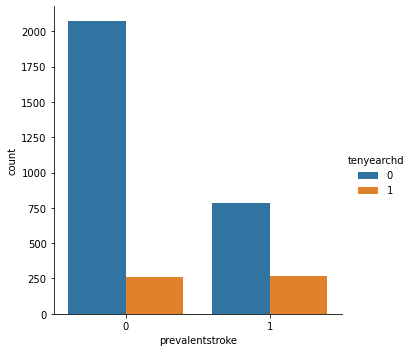

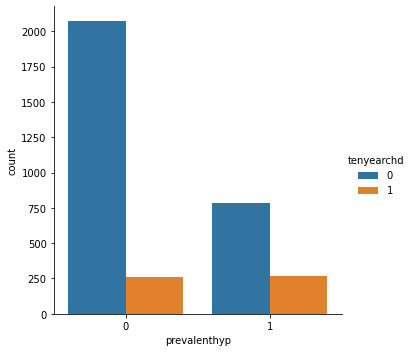

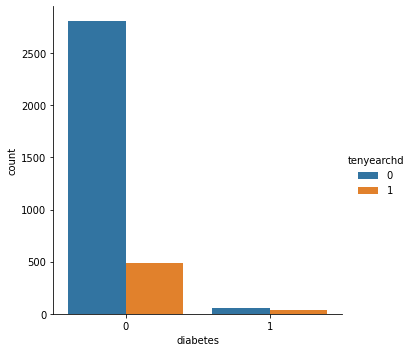

In [1797]:
for cat in categorical:

    sns.catplot(data=df_full_train, kind='count', x=cat, hue='tenyearchd')


# 3. Feature Importance

## 3.1 Feature Importance: CHD and Risk Ratio

In [1798]:
df_full_train.tenyearchd.value_counts(normalize=True)

0    0.843953
1    0.156047
Name: tenyearchd, dtype: float64

In [1799]:
global_risk = df_full_train.tenyearchd.mean()

In [1800]:
from IPython.display import display
for cat in categorical:
	df_group = df_full_train.groupby(cat).tenyearchd.agg(['mean', 'count'])
	df_group['diff'] = df_group['mean'] - global_risk
	df_group['risk'] = df_group['mean'] / global_risk
	display(df_group)
	print()

,mean,count,diff,risk
male,,,,
0,0.124614,1942,-0.031433,0.798565
1,0.198204,1448,0.042157,1.270157


,mean,count,diff,risk
education,,,,
1.0,0.196135,1397,0.040087,1.256893
2.0,0.120285,981,-0.035762,0.770827
3.0,0.121597,551,-0.034450,0.779233
4.0,0.146667,375,-0.009381,0.939887
nan,0.174419,86,0.018371,1.117730


,mean,count,diff,risk
currentsmoker,,,,
0,0.150669,1719,-0.005378,0.965535
1,0.161580,1671,0.005533,1.035455


,mean,count,diff,risk
bpmeds,,,,
0.0,0.149538,3250,-0.006509,0.958290
1.0,0.353535,99,0.197488,2.265567
nan,0.195122,41,0.039075,1.250403


,mean,count,diff,risk
prevalentstroke,,,,
0,0.112965,2337,-0.043082,0.723918
1,0.251662,1053,0.095615,1.612729


,mean,count,diff,risk
prevalenthyp,,,,
0,0.112965,2337,-0.043082,0.723918
1,0.251662,1053,0.095615,1.612729


,mean,count,diff,risk
diabetes,,,,
0,0.148788,3300,-0.007259,0.953480
1,0.422222,90,0.266175,2.705734


For gender variable male more likely getting caught Coronary heart disease (**<i>CHD</i>**). Current smoker is interesting. Doesn't affect to CHD people smoking or not smoking. People who using blood pressure medication(**<i> bpmeds</i>**) is more likely high risk of getting caught CHD. People who had previously had a stroke and diabetes is more likely high risk o getting caught CHD. Lastly people who had prevalent hypertensive (**<i> High blood pressure </i>**) is more likely getting risk of CHD. 

## 3.2 Feature Importance: Mutual Information

In [1801]:
from sklearn.metrics import mutual_info_score

In [1802]:
df_scores= []
for cat in categorical:
	m_info = mutual_info_score(df_full_train.tenyearchd, df_full_train[f'{cat}'])
	df_scores.append(m_info)

In [1803]:
df_scores = pd.DataFrame(df_scores, columns=['score'])

In [1804]:
df_scores =df_scores.assign(categorical = pd.Series(categorical))

In [1805]:
df_scores.sort_values(by='score', ascending=False)


,score,categorical
4,0.014695,prevalentstroke
5,0.014695,prevalenthyp
6,0.005543,diabetes
0,0.004977,male
1,0.004715,education
3,0.003633,bpmeds
2,0.000113,currentsmoker


Look like prevalent hypertension is an important variable. Interesting in here current smokers not considering as an important variable.

## 3.3) Exploratory Data Analysis For Correlated Data

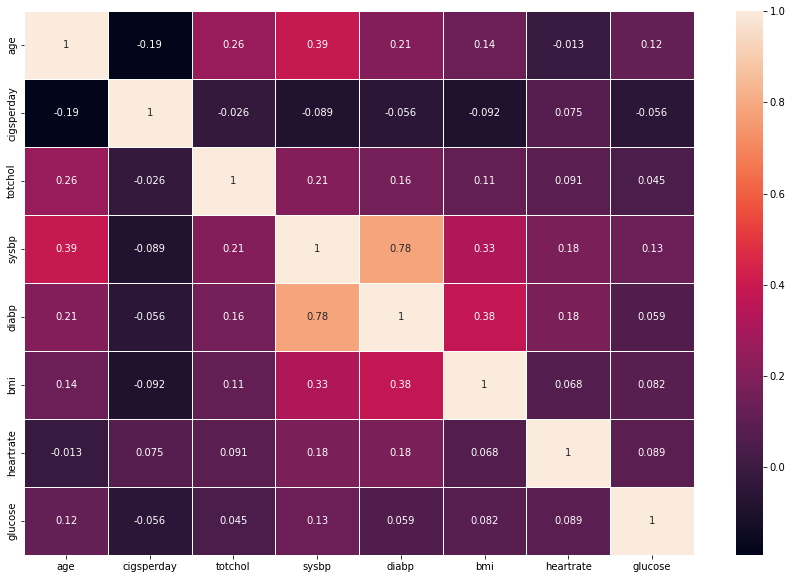

In [1806]:
plt.figure(figsize=(15,10))  
sns.heatmap(df[numerical].corr(),annot=True,linewidths=.5)
plt.show()

Systolic blood and diastolic blood pressure is highly correlated.

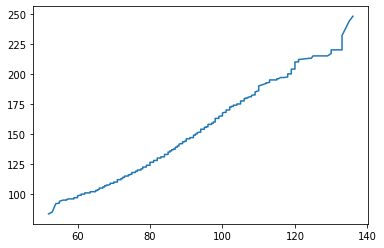

In [1807]:
x = df_train.diabp.sort_values()
y = df_train.sysbp.sort_values()
plt.plot(x,y)

# 4 Logistic Regression

In [1808]:
from sklearn.feature_extraction import DictVectorizer

In [1809]:
train_dicts = df_train.to_dict(orient = 'records')
dv = DictVectorizer(sparse=False)

In [1810]:
X_train = dv.fit_transform(train_dicts)

In [1811]:
X_train.shape

(2542, 26)

In [1812]:
dv.get_feature_names_out()

array(['age', 'bmi', 'bpmeds=0.0', 'bpmeds=1.0', 'bpmeds=nan',
       'cigsperday', 'currentsmoker=0', 'currentsmoker=1', 'diabetes=0',
       'diabetes=1', 'diabp', 'education=1.0', 'education=2.0',
       'education=3.0', 'education=4.0', 'education=nan', 'glucose',
       'heartrate', 'male=0', 'male=1', 'prevalenthyp=0',
       'prevalenthyp=1', 'prevalentstroke=0', 'prevalentstroke=1',
       'sysbp', 'totchol'], dtype=object)

In [1813]:
df_train.dtypes

male                object
age                  int64
education           object
currentsmoker       object
cigsperday         float64
bpmeds              object
prevalentstroke     object
prevalenthyp        object
diabetes            object
totchol            float64
sysbp              float64
diabp              float64
bmi                float64
heartrate          float64
glucose            float64
dtype: object

In [1814]:
val_dicts = df_val.to_dict(orient='records')
dv_val = DictVectorizer(sparse=False)
X_val = dv_val.fit_transform(val_dicts)

In [1815]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
import sklearn.metrics as metrics

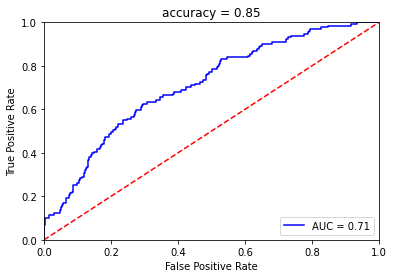

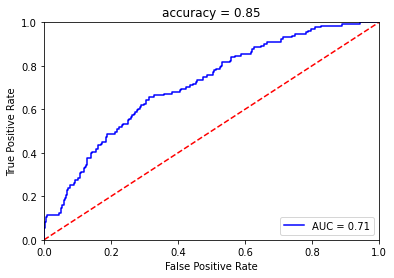

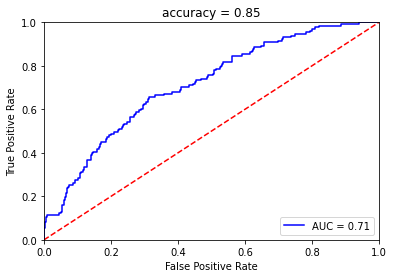

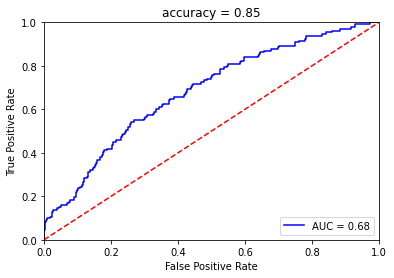

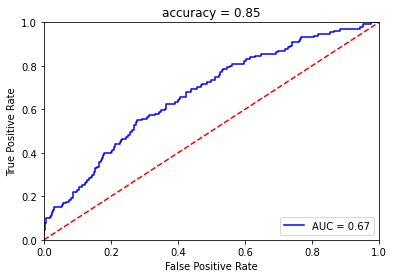

In [1816]:
df_scores = []

solver=['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']

for sol in solver:

	model = LogisticRegression(solver = sol, C = 1, random_state=1, max_iter = 10000)
	model.fit(X_train, y_train)
	y_pred = model.predict_proba(X_val)[:,1]
	y_pred2 = model.predict(X_val)
	fpr, tpr, threshold = metrics.roc_curve(y_val, y_pred)
	accuracy = accuracy_score(y_pred2, y_val)
	roc_auc = metrics.auc(fpr, tpr)



	plt.title('accuracy = %0.2f'% accuracy)
	plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f'% roc_auc)
	plt.legend(loc = 'lower right')
	plt.plot([0, 1], [0, 1],'r--')
	plt.plot()
	plt.xlim([0, 1])
	plt.ylim([0, 1])
	plt.ylabel('True Positive Rate')
	plt.xlabel('False Positive Rate')
	plt.show()



Accuracy scores are same but best AUC performance is liblinear and newton-cg.

## 4.1 Cross Validation

In [1817]:
from tqdm.auto import tqdm
import warnings
warnings.filterwarnings('ignore')

In [1818]:
def train(df_train, y_train, C=1.0):
   
        dicts = df_train.to_dict(orient='records')

        dv = DictVectorizer(sparse=False)
        X_train = dv.fit_transform(dicts)

        model = LogisticRegression(C=C, max_iter=1000, solver = 'liblinear')
        model.fit(X_train, y_train)
        
        return dv, model

In [1819]:
dv, model = train(df_train, y_train, C=0.001)

def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

y_pred = predict(df_val, dv, model)

In [1820]:
from sklearn.model_selection import KFold

In [1821]:
n_splits = 5

for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []
    accuracy = []
    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.tenyearchd.values
        y_val = df_val.tenyearchd.values
        

        
        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

  

 14%|█▍        | 1/7 [00:00<00:03,  1.69it/s]

C=0.001 0.626 +- 0.021


 29%|██▊       | 2/7 [00:01<00:03,  1.62it/s]

C=0.01 0.659 +- 0.018


 43%|████▎     | 3/7 [00:01<00:02,  1.55it/s]

C=0.1 0.647 +- 0.016


 57%|█████▋    | 4/7 [00:02<00:01,  1.51it/s]

C=0.5 0.632 +- 0.016


 71%|███████▏  | 5/7 [00:03<00:01,  1.46it/s]

C=1 0.627 +- 0.016


 86%|████████▌ | 6/7 [00:04<00:00,  1.43it/s]

C=5 0.611 +- 0.019


100%|██████████| 7/7 [00:04<00:00,  1.47it/s]

C=10 0.610 +- 0.025


In [1822]:
def train(df_train, y_train, C=1.0):
   
        dicts = df_train.to_dict(orient='records')

        dv = DictVectorizer(sparse=False)
        X_train = dv.fit_transform(dicts)

        model = LogisticRegression(C=C, max_iter=1000, solver = 'lbfgs')
        model.fit(X_train, y_train)
        
        return dv, model


dv, model = train(df_train, y_train, C=0.001)
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

y_pred = predict(df_val, dv, model)


n_splits = 5

for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []
    accuracy = []
    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.tenyearchd.values
        y_val = df_val.tenyearchd.values

         

        
        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.4f +- %.3f' % (C, np.mean(scores), np.std(scores)))


dv, model = train(df_full_train, df_full_train.tenyearchd, C=0.5)
y_pred = predict(df_val, dv, model)
auc = roc_auc_score(y_val, y_pred)
acc = accuracy_score(y_val, y_pred  >= 0.5)

print(auc, acc)

 14%|█▍        | 1/7 [00:01<00:08,  1.37s/it]

C=0.001 0.7165 +- 0.016


 29%|██▊       | 2/7 [00:03<00:09,  1.96s/it]

C=0.01 0.7219 +- 0.014


 43%|████▎     | 3/7 [00:06<00:09,  2.38s/it]

C=0.1 0.7223 +- 0.014


 57%|█████▋    | 4/7 [00:09<00:07,  2.53s/it]

C=0.5 0.7206 +- 0.019


 71%|███████▏  | 5/7 [00:12<00:05,  2.62s/it]

C=1 0.7158 +- 0.016


 86%|████████▌ | 6/7 [00:14<00:02,  2.69s/it]

C=5 0.7193 +- 0.017


100%|██████████| 7/7 [00:17<00:00,  2.53s/it]

C=10 0.7157 +- 0.016


0.7068835910652921 0.8584070796460177


In [1823]:
def train(df_train, y_train, C=1.0):
   
        dicts = df_train.to_dict(orient='records')

        dv = DictVectorizer(sparse=False)
        X_train = dv.fit_transform(dicts)

        model = LogisticRegression(C=C, max_iter=1000, solver = 'newton-cg')
        model.fit(X_train, y_train)
        
        return dv, model


dv, model = train(df_train, y_train, C=0.001)
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

y_pred = predict(df_val, dv, model)


n_splits = 5

for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []
    accuracy = []
    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.tenyearchd.values
        y_val = df_val.tenyearchd.values

         

        
        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.4f +- %.3f' % (C, np.mean(scores), np.std(scores)))

 14%|█▍        | 1/7 [00:01<00:07,  1.33s/it]

C=0.001 0.7166 +- 0.016


 29%|██▊       | 2/7 [00:02<00:06,  1.33s/it]

C=0.01 0.7219 +- 0.014


 43%|████▎     | 3/7 [00:03<00:05,  1.32s/it]

C=0.1 0.7222 +- 0.014


 57%|█████▋    | 4/7 [00:05<00:03,  1.27s/it]

C=0.5 0.7223 +- 0.014


 71%|███████▏  | 5/7 [00:06<00:02,  1.22s/it]

C=1 0.7222 +- 0.014


 86%|████████▌ | 6/7 [00:07<00:01,  1.23s/it]

C=5 0.7221 +- 0.014


100%|██████████| 7/7 [00:08<00:00,  1.26s/it]

C=10 0.7221 +- 0.014


For logistic regression best parameters are c = 0.5, logistic algorithm is newton-cg.

In [1824]:
dv, model = train(df_full_train, df_full_train.tenyearchd, C=0.5)
y_pred = predict(df_val, dv, model)
auc = roc_auc_score(y_val, y_pred)
acc = accuracy_score(y_val, y_pred  >= 0.5)

print(auc, acc)

0.7127899484536082 0.8584070796460177


# 5. Decision Tree 


In [1825]:
from sklearn.tree import DecisionTreeClassifier

In [1826]:
train_dicts_tree = df_train_tree.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train_tree = dv.fit_transform(train_dicts_tree)
dt = DecisionTreeClassifier()
dt.fit(X_train_tree, y_train_tree)

DecisionTreeClassifier()

In [1827]:
val_dicts_tree = df_val_tree.to_dict(orient='records')
X_val_tree = dv.fit_transform(val_dicts_tree)

In [1828]:
y_val_tree_pred = dt.predict_proba(X_val_tree)[:,1]

In [1829]:
roc_auc_score(y_val_tree_pred, y_val_tree)

0.5506706684452349

In [1830]:
accuracy_score(y_val_tree, y_val_tree_pred)

0.7488207547169812

In [1831]:
y_train_tree_pred = dt.predict_proba(X_train_tree)[:,1]

In [1832]:
roc_auc_score(y_train_tree, y_train_tree_pred)

1.0

Model was overfitting

## 5.1 Decision Trees Parameter Tuning

In [1833]:
for d in [1,2,3,4,5,6,10,15,20, None]:
	dt = DecisionTreeClassifier(max_depth=d)
	dt.fit(X_train_tree, y_train_tree)
	y_pred_tree = dt.predict_proba(X_val_tree)[:, 1]
	auc = roc_auc_score(y_val_tree, y_pred_tree)

	print('%4s -> %.3f' % (d, auc))

   1 -> 0.587
   2 -> 0.613
   3 -> 0.696
   4 -> 0.669
   5 -> 0.686
   6 -> 0.659
  10 -> 0.581
  15 -> 0.556
  20 -> 0.563
None -> 0.566


In [1834]:
params = []
for d in [3,4,5,6,10,15,20,25,30]:
	for s in [1,2,5,10,20,50,100,150,200, 500]:
		dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
		dt.fit(X_train_tree, y_train_tree)
		y_pred_tree = dt.predict_proba(X_val_tree)[:,1]
		auc = roc_auc_score(y_val_tree, y_pred_tree)
		print(('%4s, %3d) -> %.3f' % (d,s, auc )))
		params.append((s,d, auc))

   3,   1) -> 0.696
   3,   2) -> 0.696
   3,   5) -> 0.708
   3,  10) -> 0.708
   3,  20) -> 0.650
   3,  50) -> 0.650
   3, 100) -> 0.649
   3, 150) -> 0.639
   3, 200) -> 0.639
   3, 500) -> 0.667
   4,   1) -> 0.669
   4,   2) -> 0.669
   4,   5) -> 0.671
   4,  10) -> 0.688
   4,  20) -> 0.662
   4,  50) -> 0.675
   4, 100) -> 0.663
   4, 150) -> 0.647
   4, 200) -> 0.652
   4, 500) -> 0.667
   5,   1) -> 0.683
   5,   2) -> 0.683
   5,   5) -> 0.689
   5,  10) -> 0.665
   5,  20) -> 0.684
   5,  50) -> 0.645
   5, 100) -> 0.650
   5, 150) -> 0.655
   5, 200) -> 0.652
   5, 500) -> 0.667
   6,   1) -> 0.653
   6,   2) -> 0.648
   6,   5) -> 0.699
   6,  10) -> 0.663
   6,  20) -> 0.660
   6,  50) -> 0.643
   6, 100) -> 0.650
   6, 150) -> 0.655
   6, 200) -> 0.652
   6, 500) -> 0.667
  10,   1) -> 0.580
  10,   2) -> 0.602
  10,   5) -> 0.627
  10,  10) -> 0.649
  10,  20) -> 0.628
  10,  50) -> 0.635
  10, 100) -> 0.650
  10, 150) -> 0.655
  10, 200) -> 0.652
  10, 500) -> 0.667


In [1835]:
columns = ['depth', 'leaf_sample', 'auc']
df_params = pd.DataFrame(params, columns=columns)

In [1836]:
df_params.sort_values('auc', ascending=False)

,depth,leaf_sample,auc
3,10,3,0.708220
2,5,3,0.708034
32,5,6,0.699304
0,1,3,0.695742
1,2,3,0.695742
...,...,...,...
71,2,25,0.571960
51,2,15,0.569730
70,1,25,0.568292
50,1,15,0.555964


In [1837]:
df_params_pivot = df_params.pivot(index = 'leaf_sample', columns=['depth'], values=['auc'])

<AxesSubplot:xlabel='None-depth', ylabel='leaf_sample'>

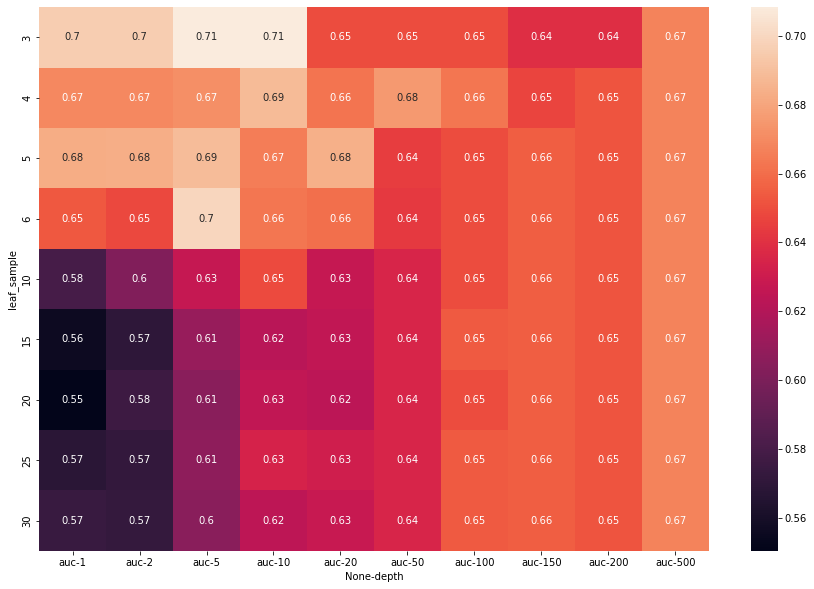

In [1838]:
plt.figure(figsize = (15,10))
sns.heatmap(df_params_pivot, annot = True)

Best auc performance for leaf sample 3 and best depth is 5.

## 5.2 Final Decision Tree Model

In [1839]:
dt = DecisionTreeClassifier(max_depth=3, min_samples_leaf=10)
dt.fit(X_train_tree, y_train_tree)
y_pred_tree = dt.predict_proba(X_val_tree)[:,1]
y_pred_tree2 = dt.predict(X_val_tree)
auc = roc_auc_score(y_val_tree, y_pred_tree)
accuracy_score(y_val_tree, y_pred_tree2)
print(auc.round(3))

0.708


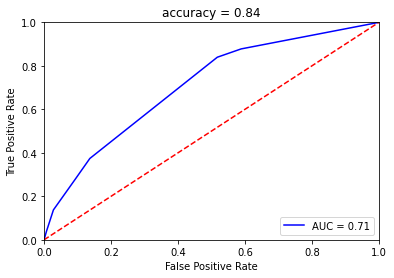

In [1840]:
fpr, tpr, threshold = metrics.roc_curve(y_val_tree, y_pred_tree)
roc_auc = metrics.auc(fpr, tpr)
accuracy = accuracy_score(y_val_tree, y_pred_tree2)


plt.title('accuracy = %0.2f'% accuracy)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f'% roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.plot()
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# 6. Random Forest

In [1841]:
from sklearn.ensemble import RandomForestClassifier


In [1842]:
train_dicts_forest = df_train_forest.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train_forest = dv.fit_transform(train_dicts_forest)


val_dicts_forest = df_val_foresst.to_dict(orient='recoreds')
dv = DictVectorizer(sparse=False)
X_val_forest = dv.fit_transform(val_dicts_forest)

In [1843]:
rf_scores= []
for n in range(10, 201, 10):
	rf = RandomForestClassifier(n_estimators=n, random_state=1)
	rf.fit(X_train_forest, y_train_forest)

	y_pred_forest_val = rf.predict_proba(X_val_forest)[:,1]
	auc = roc_auc_score(y_val_forest, y_pred_forest_val)
	rf_scores.append((n, auc))


In [1844]:
columns = ['n_estimator', 'auc']
df_rf_scores = pd.DataFrame(rf_scores, columns=columns)

In [1845]:
df_rf_scores.sort_values('auc', ascending=False)

,n_estimator,auc
15,160,0.688513
16,170,0.687784
14,150,0.687742
17,180,0.686996
12,130,0.686805
13,140,0.686698
7,80,0.685623
18,190,0.685586
10,110,0.685389
9,100,0.685314


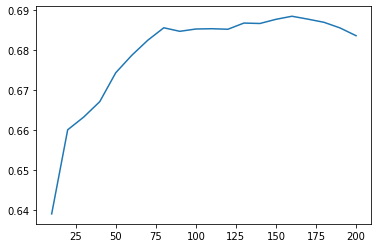

In [1846]:
plt.plot(df_rf_scores.n_estimator, df_rf_scores.auc)

In [1847]:
rf_scores = []

for d in [5, 10, 15, 20, 50, 100]:
    for n in range(10, 201, 10):

        rf = RandomForestClassifier(
            n_estimators=n, max_depth=d, random_state=1)
        rf.fit(X_train_forest, y_train_forest)

        y_pred_forest_val = rf.predict_proba(X_val_forest)[:, 1]
        auc = roc_auc_score(y_val_forest, y_pred_forest_val)
        rf_scores.append((n,d, auc))


In [1848]:
columns = ['n_estimator', 'max_depth', 'auc']
df_rf_scores = pd.DataFrame(rf_scores, columns=columns)

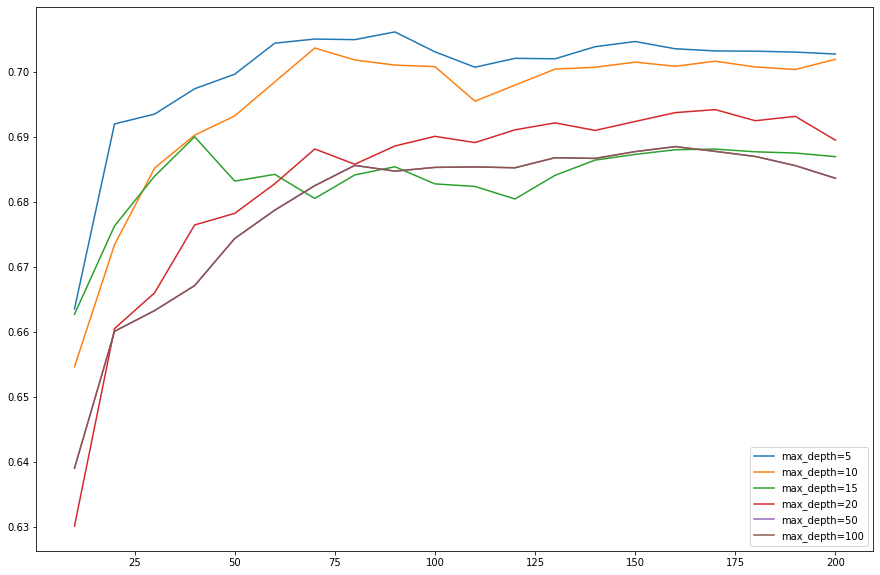

In [1849]:
plt.figure(figsize=(15,10))  
for d in [5, 10, 15, 20, 50, 100]:
	df_rf_subset = df_rf_scores[df_rf_scores.max_depth ==d]
	plt.plot(df_rf_subset.n_estimator, df_rf_subset.auc, label = 'max_depth=%d' %d)

plt.legend()

<AxesSubplot:xlabel='None-depth', ylabel='leaf_sample'>

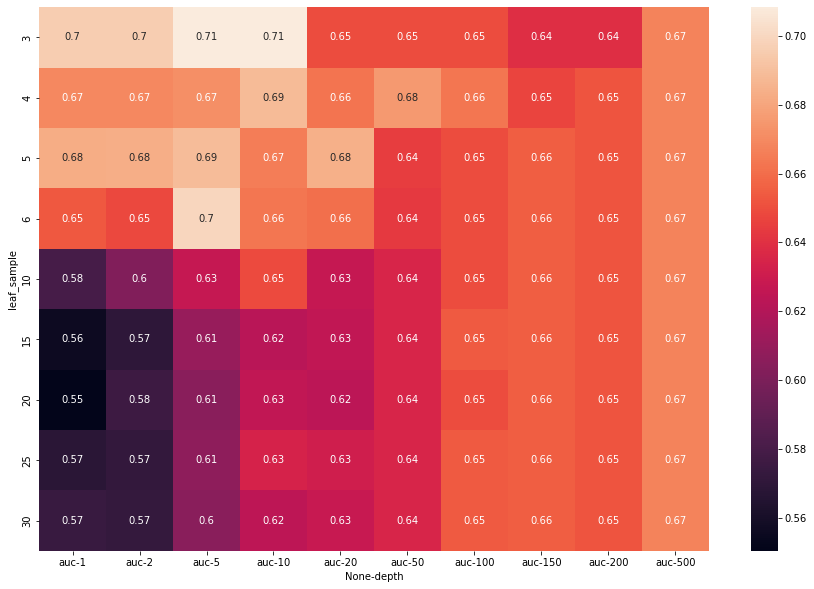

In [1850]:
df_rf_scores_pivot = df_rf_scores.pivot(index = 'n_estimator', columns=['max_depth'], values = ['auc'])
plt.figure(figsize = (15,10))
sns.heatmap(df_params_pivot, annot = True)

max_depth 5 and 10 is better auc score.

In [1851]:
for s in [1,3,5,15,20,50,100]:
	for n in range(10,201,10):
		rf = RandomForestClassifier(n_estimators=n, max_depth=5, min_samples_leaf=s, random_state=1)


		rf.fit(X_train_forest, y_train_forest)
		y_pred_forest_val = rf.predict_proba(X_val_forest)[:,1]
		auc = roc_auc_score(y_val_forest, y_pred_forest_val)
		rf_scores.append((s,n, auc))

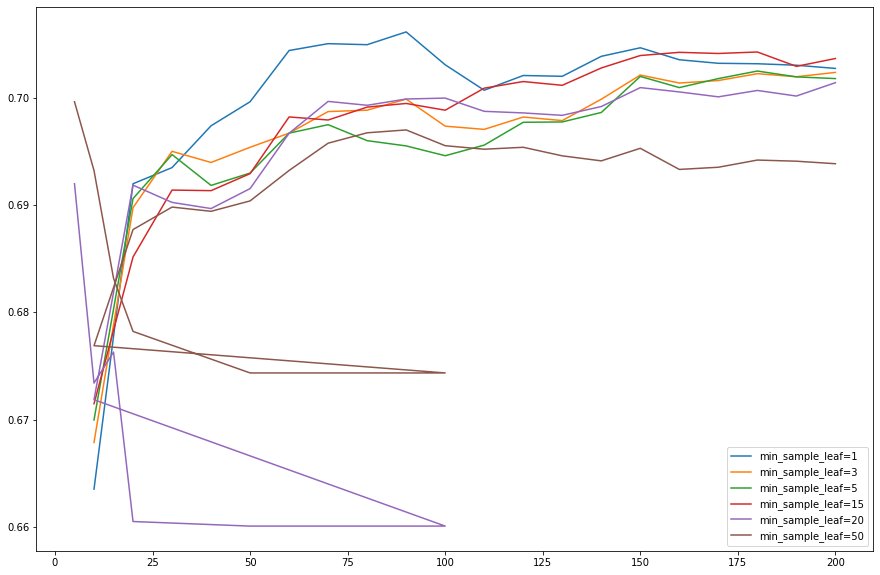

In [1852]:
columns = ['min_sample_leaf', 'n_estimator', 'auc']
df_rf_scores = pd.DataFrame(rf_scores, columns=columns)

plt.figure(figsize=(15, 10))
for s in [1, 3, 5, 15, 20, 50]:
    df_rf_subset = df_rf_scores[df_rf_scores.min_sample_leaf == s]
    plt.plot(df_rf_subset.n_estimator, df_rf_subset.auc,
             label='min_sample_leaf=%d' % s)

plt.legend()

In [1853]:
df_rf_scores.sort_values('auc', ascending=False).T

,128,8,126,6,7,127,14,134,5,125,...,102,40,61,81,101,240,20,80,100,60
min_sample_leaf,1.000000,90.000000,1.000000,70.000000,80.000000,1.000000,150.000000,1.000000,60.000000,1.000000,...,30.00000,10.000000,20.000000,20.000000,20.000000,100.000000,10.000000,10.000000,10.000000,10.00000
n_estimator,90.000000,5.000000,70.000000,5.000000,5.000000,80.000000,5.000000,150.000000,5.000000,60.000000,...,100.00000,15.000000,20.000000,50.000000,100.000000,10.000000,10.000000,50.000000,100.000000,20.00000
auc,0.706176,0.706176,0.705079,0.705079,0.704984,0.704984,0.704696,0.704696,0.704441,0.704441,...,0.66326,0.662701,0.660497,0.660071,0.660071,0.657665,0.654604,0.639002,0.639002,0.63008


minimum sample leaf 1 has best auc. Also 15 has more stabil after 100 n estimator.

In [1854]:
final_scores = []
for x in [1, 15]:
    for y in [5, 10]:
        for n in range(50, 200):
            for max_f in [ 'auto', 'sqrt', 'log2']:
                rf = RandomForestClassifier(
                    n_estimators=n, max_depth=x, min_samples_leaf=y, random_state=1, n_jobs=-1, max_features=max_f)
                rf.fit(X_train_forest, y_train_forest)
                y_pred_forest_val = rf.predict_proba(X_val_forest)[:, 1]
                y_ped2 = rf.predict(X_val_forest)
                accuracy =accuracy_score(y_val_forest, y_pred2)
                auc = roc_auc_score(y_val_forest, y_pred_forest_val)
                final_scores.append((n, x, y, max_f, auc, accuracy))


In [1855]:
col = ['n_estimators', 'max_depth', 'min_samples_leaf','max_f','auc','accuracy']
df_final_scores = pd.DataFrame(final_scores, columns=col)

In [1856]:
df_final_scores.sort_values('auc', ascending=False)

,n_estimators,max_depth,min_samples_leaf,max_f,auc,accuracy
1478,92,15,10,log2,0.705111,0.854953
1475,91,15,10,log2,0.704387,0.854953
1484,94,15,10,log2,0.704302,0.854953
1481,93,15,10,log2,0.704260,0.854953
1499,99,15,10,log2,0.704238,0.854953
...,...,...,...,...,...,...
2,50,1,5,log2,0.683446,0.854953
451,50,1,10,sqrt,0.675445,0.854953
450,50,1,10,auto,0.675445,0.854953
1,50,1,5,sqrt,0.675445,0.854953


Final model parameters is n_estimator 71, minimum sample leaf 15 and max_depth are 5.

In [1857]:
final_rf = RandomForestClassifier(n_estimators=92, max_depth=15, min_samples_leaf=10, max_features='log2', random_state=1, n_jobs=-1)
final_rf.fit(X_train_forest, y_train_forest)
y_pred_forest_val = final_rf.predict_proba(X_val_forest)[:, 1]
auc = roc_auc_score(y_val_forest, y_pred_forest_val)
auc

0.7051114163126684

# 7. Gradient Boosting and XGBoost

In [1858]:
import xgboost as xgb

In [1859]:
features = dv.get_feature_names()

In [1860]:
train_dicts_boost = df_train_boost.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train_boost = dv.fit_transform(train_dicts_boost)


val_dicts_boost = df_val_boost.to_dict(orient='recoreds')
dv = DictVectorizer(sparse=False)
X_val_boost = dv.fit_transform(val_dicts_boost)

In [1914]:
features
len(features)

26

In [1862]:
dtrain = xgb.DMatrix(X_train_boost, label = y_train_boost, feature_names=features)

dval = xgb.DMatrix(X_val_boost, label = y_val_boost, feature_names=features)


In [1863]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [1864]:
%%capture output

xgb_params = {
	'eta': 0.3,
	'max_depth':6,
	'min_child_weight':1,
	'objective': 'binary:logistic',
	'nthread':8,
	'eval_metric':'auc',
	'seed':1,
	'verbosity':1,

}

model = xgb.train(xgb_params, dtrain, num_boost_round=50, verbose_eval=5, evals=watchlist)


In [1865]:
s = output.stdout

In [1866]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [1867]:
df_score = parse_xgb_output(output)

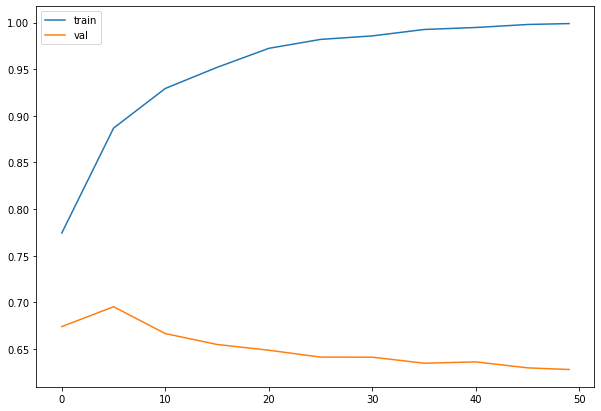

In [1868]:
plt.figure(figsize=(10,7))
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

In [1869]:
roc_auc_score(y_val_boost, y_pred_val)

0.6991440160976077

In [1870]:
scores = {}

In [1871]:
%%capture output

xgb_params = {
    'eta': 0.03,
    'max_depth': 3,
    'min_child_weight': 30,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=300,verbose_eval=5, evals=watchlist)


In [1872]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)


In [1873]:
scores.keys()

dict_keys(['eta=0.03'])

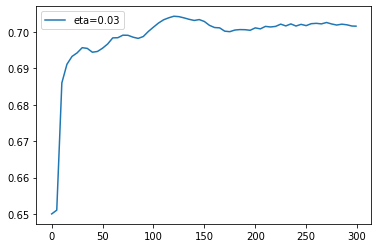

In [1874]:
for key, df_score in scores.items():
	plt.plot(df_score.num_iter, df_score.val_auc, label = key)
plt.legend()

eta = 0.03 best parameter.

In [1875]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)

scores.keys()

dict_keys(['eta=0.03', 'max_depth=3'])

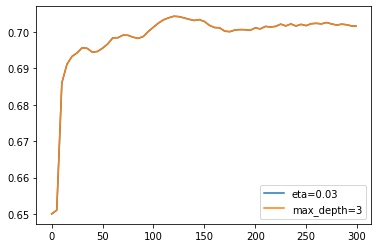

In [1876]:
for max_depth, df_score in scores.items():
	plt.plot(df_score.num_iter, df_score.val_auc, label = max_depth )


plt.legend()

max_depth=3 best paramter

In [1877]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
scores.keys()

dict_keys(['eta=0.03', 'max_depth=3', 'min_child_weight=30'])

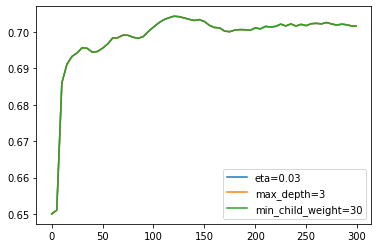

In [1878]:
for min_child_weight, df_score in scores.items():
	plt.plot(df_score.num_iter, df_score.val_auc, label = min_child_weight)
plt.legend()

min_child_weight = 10

## Final Gradient Boosting and XGBoost Model

In [1879]:
xgb_params = {
    'eta': 0.01,
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
    'alpha' :2,
    'lambda':2,
    'subsample':0.3,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=150,verbose_eval=5, evals=watchlist)


[0]	train-auc:0.63357	val-auc:0.62794
[5]	train-auc:0.70240	val-auc:0.71333
[10]	train-auc:0.70988	val-auc:0.71367
[15]	train-auc:0.71049	val-auc:0.71545
[20]	train-auc:0.72148	val-auc:0.72415
[25]	train-auc:0.72091	val-auc:0.72569
[30]	train-auc:0.72179	val-auc:0.72241
[35]	train-auc:0.73322	val-auc:0.71758
[40]	train-auc:0.73443	val-auc:0.71605
[45]	train-auc:0.73653	val-auc:0.72287
[50]	train-auc:0.73557	val-auc:0.72219
[55]	train-auc:0.73694	val-auc:0.72464
[60]	train-auc:0.73739	val-auc:0.72285
[65]	train-auc:0.73743	val-auc:0.72161
[70]	train-auc:0.73770	val-auc:0.72127
[75]	train-auc:0.73740	val-auc:0.72209
[80]	train-auc:0.74072	val-auc:0.72083
[85]	train-auc:0.74051	val-auc:0.72012
[90]	train-auc:0.74276	val-auc:0.72455
[95]	train-auc:0.74319	val-auc:0.72492
[100]	train-auc:0.74370	val-auc:0.72419
[105]	train-auc:0.74535	val-auc:0.72593
[110]	train-auc:0.74674	val-auc:0.72575
[115]	train-auc:0.74968	val-auc:0.72515
[120]	train-auc:0.75035	val-auc:0.72334
[125]	train-auc:0.7509

In [1880]:
y_pred_boost_val = model.predict(dval)


In [1881]:
accuracy_score(y_val_boost, y_pred_boost_val >=0.5)

0.847877358490566

# 8. Summary: Selecting Best Model

## Logistic Model


In [1882]:
dv, model = train(df_full_train, df_full_train.tenyearchd, C=0.5)
y_pred = predict(df_val, dv, model)
auc = roc_auc_score(y_val, y_pred)
acc = accuracy_score(y_val, y_pred  >= 0.5)

print(auc, acc)

0.7127899484536082 0.8584070796460177


## Decision Tres

In [1883]:
dt = DecisionTreeClassifier(max_depth=3, min_samples_leaf=10)
dt.fit(X_train_tree, y_train_tree)
y_pred_tree = dt.predict_proba(X_val_tree)[:,1]
y_pred_tree2 = dt.predict(X_val_tree)
auc = roc_auc_score(y_val_tree, y_pred_tree)
acc = accuracy_score(y_val_tree, y_pred_tree2)
print(auc, acc)

0.708220213570113 0.8431603773584906


## Random Forest

In [1884]:
final_rf = RandomForestClassifier(n_estimators=92, max_depth=15, min_samples_leaf=10, max_features='log2', random_state=1, n_jobs=-1)
final_rf.fit(X_train_forest, y_train_forest)
y_pred_forest_val = final_rf.predict_proba(X_val_forest)[:, 1]
auc = roc_auc_score(y_val_forest, y_pred_forest_val)
acc = accuracy_score(y_val_forest, y_pred_forest_val>=0.5)
print(auc, acc)

0.7051114163126684 0.8490566037735849


## XGBoost

In [1896]:
xgb_params = {
    'eta': 0.01,
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
    'alpha' :3,
    'lambda':2,
    'subsample':0.5,
    'colsample_bytree':0.9,
    'tree_method':'exact'
}

model = xgb.train(xgb_params, dtrain, num_boost_round=150)
y_pred_boost_val = model.predict(dval)
auc = roc_auc_score(y_val_boost, y_pred_boost_val)
acc = accuracy_score(y_val_boost, y_pred_boost_val>= 0.5)
print(auc, acc)

0.7242486186080677 0.847877358490566


### Using model

In [1886]:
test_boost = val_dicts_boost[0]

test_boost


{'male': '0',
 'age': 54,
 'education': '1.0',
 'currentsmoker': '0',
 'cigsperday': 0.0,
 'bpmeds': '0.0',
 'prevalentstroke': '1',
 'prevalenthyp': '1',
 'diabetes': '0',
 'totchol': 315.0,
 'sysbp': 176.0,
 'diabp': 87.0,
 'bmi': 29.23,
 'heartrate': 82.0,
 'glucose': 72.0}

In [1908]:
test_boost = train_dicts_boost[1]






In [1911]:
train_dicts_boost = df_train_boost.to_dict(orient='records')
dv_test = DictVectorizer(sparse=False)
X_train_boost = dv_test.fit_transform(train_dicts_boost)

In [1912]:
test = dv_test.transform(test_boost)

In [1913]:
test.shape

(1, 26)

In [1915]:
test2 = xgb.DMatrix(test, feature_names=features)

In [1916]:
test2

In [1917]:
model.predict(test2)

array([0.2753578], dtype=float32)